In [328]:
import matplotlib.pyplot as plt
import numpy as np
import re


def show_data(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    x_axis_width = ax.get_xlim()[1] - ax.get_xlim()[0]

    for i, colname in enumerate(category_names):
        widths = data[:, i].astype(float)
        starts = x_axis_width/2 - widths if colname == 'Barcelona' else x_axis_width/2
        color = 'firebrick' if colname == 'Barcelona' else 'skyblue'
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
        text_color = '#264653'
        ax.bar_label(rects, label_type='center', color=text_color,
                     padding=5)

    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    plt.show()


def show_stats_data(data: dict):
    labels = list(data.keys())
    values = list(data.values())

    def extract_numeric(value):
        if isinstance(value, str):
            # Extract numeric part using regular expression
            numeric_part = re.search(r'\d+(\.\d+)?', value)
            if numeric_part:
                return float(numeric_part.group())
        return float(value)

    float_values = [[extract_numeric(value)
                    for value in sublist] for sublist in values]

    first_team = [el[0] for el in float_values]
    second_team = [el[1] for el in float_values]
    fig, ax = plt.subplots(figsize=(10, 6))

    sum_team = [first_team[i] + second_team[i]
                for i in range(min(len(first_team), len(second_team)))]

    first_team_normalized = [first_team[i] * 100 / sum_team[i]
                             for i in range(min(len(first_team), len(sum_team)))]
    second_team_normalized = [second_team[i] * 100 / sum_team[i]
                              for i in range(min(len(second_team), len(sum_team)))]

    p1 = ax.barh(labels, [-val for val in first_team_normalized],
                 color='indianred', label='Barcelona', height=0.5)
    p2 = ax.barh(labels, second_team_normalized,
                 color='skyblue', label='Real Madrid',  height=0.5)

    for rect in p1:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2,
                f'{first_team[p1.index(rect)]}', ha='right', va='center')

    for rect in p2:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2,
                f'{second_team[p2.index(rect)]}', ha='left', va='center')

    ax.legend(loc='best',)
    ax.set_xticks([])
    plt.show()

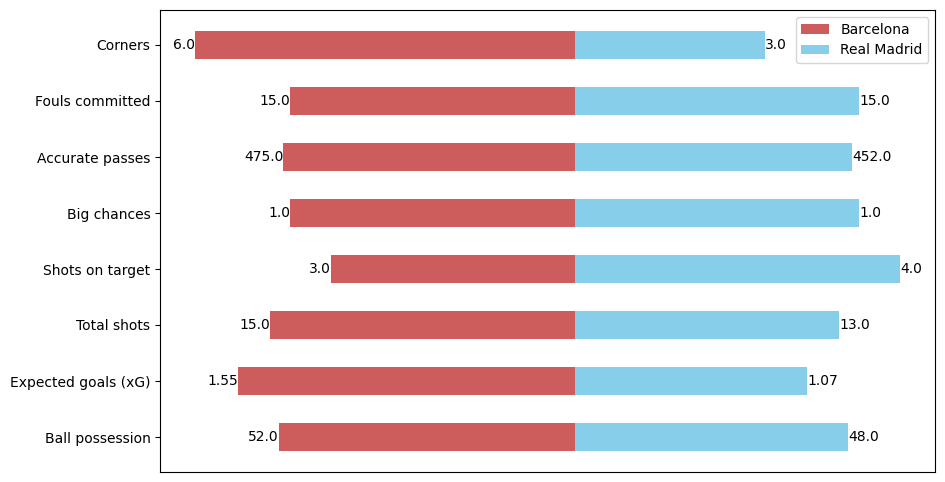

In [329]:
# Main Stat
from main_data import main_content, data as fotmob_data


stats_data = main_content['stats']['Periods']['All']['stats'][0]['stats']
result = {}

for el in stats_data:
    if (el['stats'][0]):
        result[el['title']] = el['stats']

show_stats_data(result)

home_team = fotmob_data['props']['pageProps']['general']['homeTeam']['name']
away_team = fotmob_data['props']['pageProps']['general']['awayTeam']['name']

team_names = [home_team, away_team]

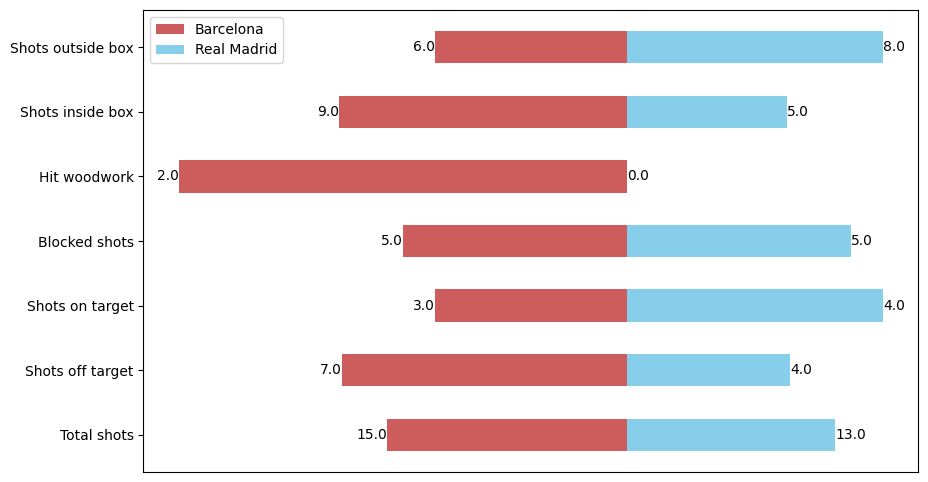

In [330]:
# Shot stat
stats_data = main_content['stats']['Periods']['All']['stats'][1]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']

show_stats_data(data)

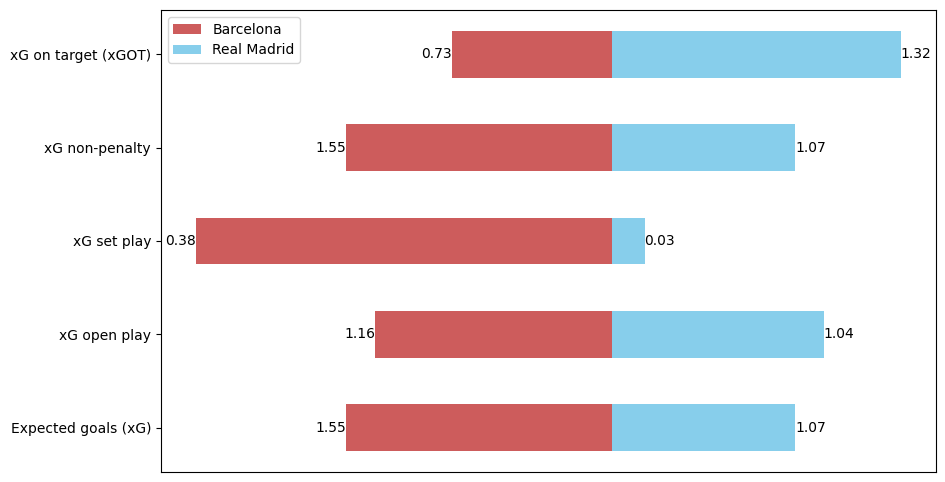

In [331]:
# xG stat

stats_data = main_content['stats']['Periods']['All']['stats'][2]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']

data_float = {key: [float(value) for value in values]
              for key, values in data.items()}

show_stats_data(data)

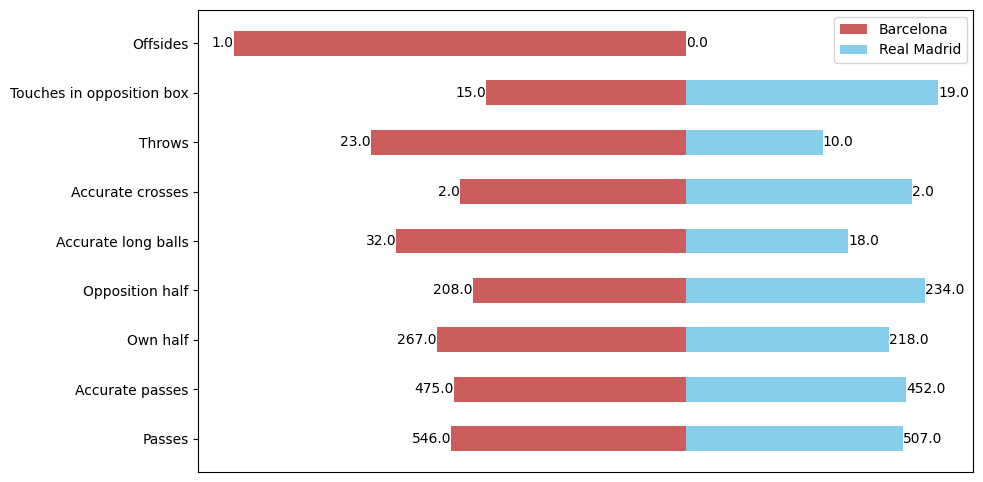

In [332]:
# Pass stat

stats_data = main_content['stats']['Periods']['All']['stats'][3]['stats']
data = {}
for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

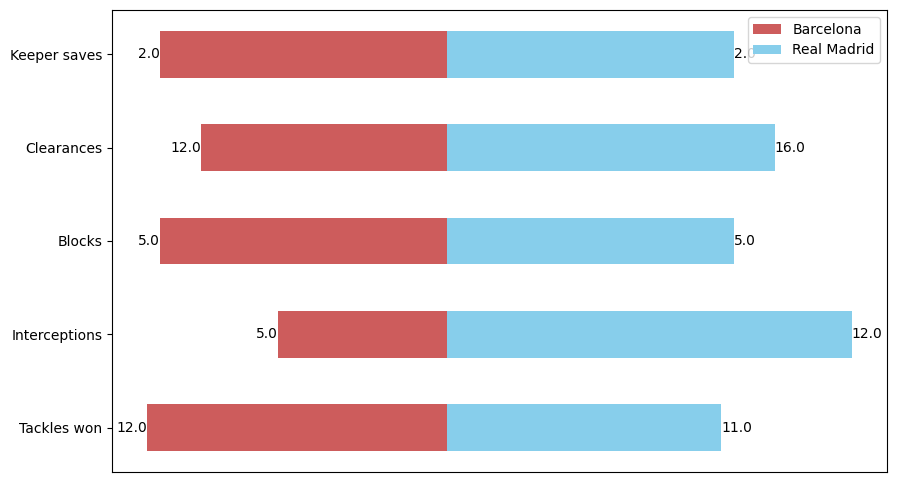

In [333]:
# Defence stat
stats_data = main_content['stats']['Periods']['All']['stats'][4]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

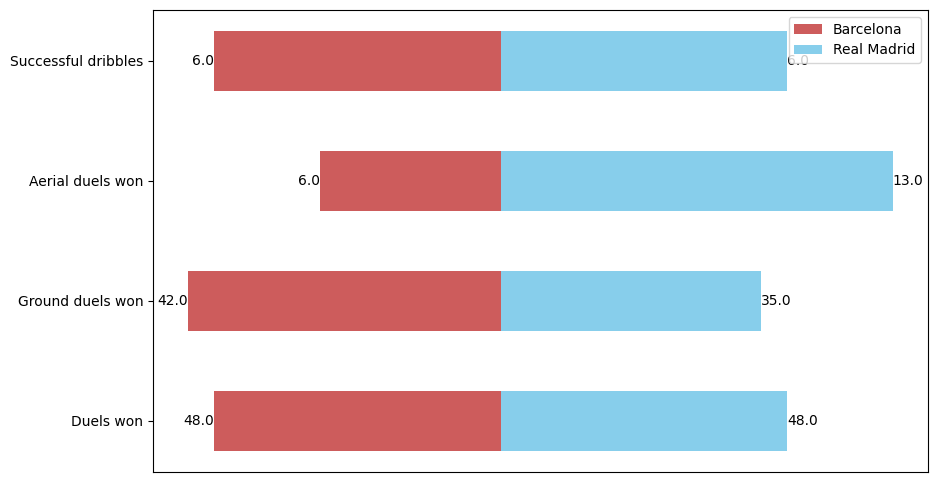

In [334]:
# Duels stat
stats_data = main_content['stats']['Periods']['All']['stats'][5]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']

show_stats_data(data)